# Arithmetic gates

In [1]:
import sys, os, os.path
base = os.path.realpath("../../..")
heap = base + "/crsq-heap/src"
if (heap) not in sys.path:
    sys.path.append(heap)
    sys.path.append(base + "/crsq-arithmetic/src")
    sys.path.append(base + "/crsq-main/src")
print(sys.path)

['/home/hideo-t/work/py/crsq/crsq-heap/src', '/home/hideo-t/work/py/crsq/crsq-arithmetic/src', '/home/hideo-t/work/py/crsq/crsq-main/src', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/home/hideo-t/work/py/crsq/crsq-papers/2023/.2023/lib/python3.10/site-packages']


In [2]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
import crsq.arithmetic as ari
import matplotlib.pyplot as plt

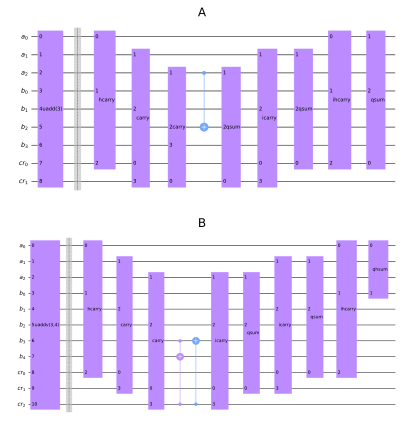

In [3]:

dpi=300
style_name='clifford'
qstyle={'name': style_name, 'dpi': dpi, 'fontsize': 18, 'subfontsize': 12}
fig, axs = plt.subplots(2,1, figsize=(5.5,6), dpi=dpi, layout='constrained')

# uadder
n=3
a = QuantumRegister(n, 'a')
b = QuantumRegister(n+1, 'b')
carry = QuantumRegister(n-1, 'cr')
qc = QuantumCircuit(a, b, carry)

# to make the internals visible:
qc.append(ari.unsigned_adder_gate(3), a[:] + b[:] + carry[:])
qc.barrier()
ari.unsigned_adder(qc, a, b, carry, use_gates=True)
ax=axs[0]
qc.draw(ax=ax,style=qstyle)
ax.set_title('A')

# uadderv

m=3
n=4
a = QuantumRegister(m, 'a')
b = QuantumRegister(n+1, 'b')
carry = QuantumRegister(n-1, 'cr')
qc = QuantumCircuit(a, b, carry)

# to make the internals visible:
qc.append(ari.unsigned_adderv_gate(m,n), a[:] + b[:] + carry[:])
qc.barrier()
ari.unsigned_adderv(qc, a, b, carry, use_gates=True)
ax = axs[1]
qc.draw(ax=ax,style=qstyle)
ax.set_title('B')

# save
filename='paper_diagrams/arith-uadder3+uadderv3,4.png'
fig.savefig(filename)

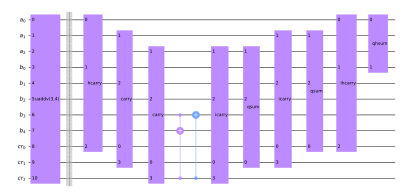

In [4]:
m=3
n=4
a = QuantumRegister(m, 'a')
b = QuantumRegister(n+1, 'b')
carry = QuantumRegister(n-1, 'cr')
qc = QuantumCircuit(a, b, carry)

# to make the internals visible:
qc.append(ari.unsigned_adderv_gate(m,n), a[:] + b[:] + carry[:])
qc.barrier()
ari.unsigned_adderv(qc, a, b, carry, use_gates=True)

fig, ax = plt.subplots(figsize=(5.5,3), dpi=dpi, layout='constrained')

qc.draw(ax=ax, style=qstyle)
filename='paper_diagrams/arith-uadderv3,4.png'
fig.savefig(filename)


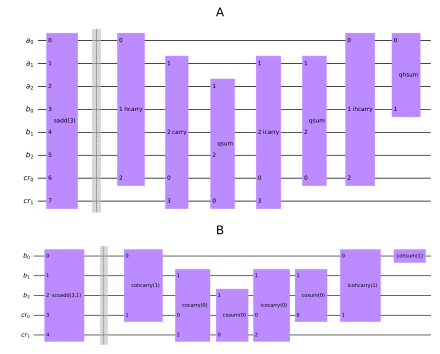

In [5]:
qstyle.update({'fontsize': 16, 'subfontsize': 10})
ratios=[1.5, 1]
fig, axs = plt.subplots(2,1, figsize=(6,5), dpi=dpi, height_ratios=ratios,layout='constrained')

#sadder
n=3
a = QuantumRegister(n, 'a')
b = QuantumRegister(n, 'b')
carry = QuantumRegister(n-1, 'cr')
qc = QuantumCircuit(a, b, carry)

# to make the internals visible:
qc.append(ari.signed_adder_gate(n), a[:] + b[:] + carry[:])
qc.barrier()
ari.signed_adder(qc, a, b, carry, use_gates=True)

ax=axs[0]
qc.draw(ax=ax,style=qstyle)
ax.set_title('A')

#scoadder

n=3
y = 1  # Add constant 1 to b register
b = QuantumRegister(n, 'b')
carry = QuantumRegister(n-1, 'cr')
qc = QuantumCircuit(b,carry)
qc.append(ari.scoadder_gate(n,y), b[:] + carry[:])
qc.barrier()
ari.scoadder(qc, y, b, carry, use_gates=True)
ax=axs[1]
qc.draw(ax=ax,style=qstyle)
ax.set_title('B')

filename='paper_diagrams/arith-sadder3+scoadder3.1.png'

# save
fig.savefig(filename)

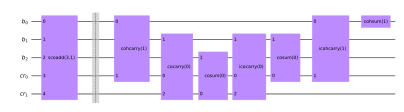

In [6]:
n=3
y = 1  # Add constant 1 to b register
# n=4
# y = -6  # Add constant 1 to b register
b = QuantumRegister(n, 'b')
carry = QuantumRegister(n-1, 'cr')
qc = QuantumCircuit(b,carry)
qc.append(ari.scoadder_gate(n,y), b[:] + carry[:])
qc.barrier()
ari.scoadder(qc, y, b, carry, use_gates=True)

fig, ax = plt.subplots(figsize=(5.5,3), dpi=dpi, layout='constrained')
qc.draw(ax=ax, style=qstyle)
filename='paper_diagrams/arith-scoadder3.1.png'
fig.savefig(filename)



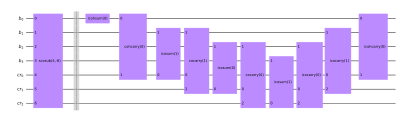

In [7]:
n=4
y = -6  # subtract constant -6 from b register
b = QuantumRegister(n, 'b')
carry = QuantumRegister(n-1, 'cr')
qc = QuantumCircuit(b,carry)
qc.append(ari.signed_cosubtractor_gate(n,y), b[:] + carry[:])
qc.barrier()
ari.signed_cosubtractor(qc, y, b, carry, use_gates=True)

fig, ax = plt.subplots(figsize=(5.5,3), dpi=dpi, layout='constrained')
qc.draw(ax=ax, style=qstyle, fold=-1)
filename='paper_diagrams/arith-scosub.1.png'
fig.savefig(filename)



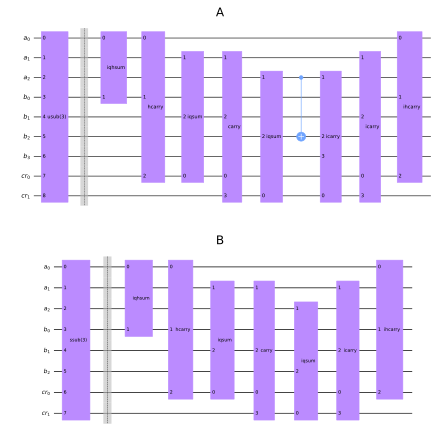

In [8]:
qstyle={'name': style_name, 'dpi': dpi, 'fontsize': 16, 'subfontsize': 10}
qstyle2={'name': style_name, 'dpi': dpi, 'fontsize': 13, 'subfontsize': 10}
ratios=[1.3, 1]
fig, axs = plt.subplots(2,1, figsize=(6,6), dpi=dpi,height_ratios=ratios,layout='constrained')

# usub(3)
n=3
a = QuantumRegister(n, 'a')
b = QuantumRegister(n+1, 'b')
carry = QuantumRegister(n-1, 'cr')
qc = QuantumCircuit(a, b, carry)

# to make the internals visible:
qc.append(ari.unsigned_subtractor_gate(3), a[:] + b[:] + carry[:])
qc.barrier()
ari.unsigned_subtractor(qc, a, b, carry, use_gates=True)

ax=axs[0]
qc.draw(ax=ax,style=qstyle)
ax.set_title('A')

# ssub(3)
n=3
a = QuantumRegister(n, 'a')
b = QuantumRegister(n, 'b')
carry = QuantumRegister(n-1, 'cr')
qc = QuantumCircuit(a, b, carry)

# to make the internals visible:
qc.append(ari.signed_subtractor_gate(3), a[:] + b[:] + carry[:])
qc.barrier()
ari.signed_subtractor(qc, a, b, carry, use_gates=True)

ax=axs[1]
qc.draw(ax=ax,style=qstyle2)
ax.set_title('B')

filename='paper_diagrams/arith-usub3+ssub3.png'

# save
fig.savefig(filename)

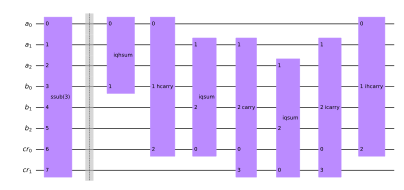

In [9]:
n=3
a = QuantumRegister(n, 'a')
b = QuantumRegister(n, 'b')
carry = QuantumRegister(n-1, 'cr')
qc = QuantumCircuit(a, b, carry)

# to make the internals visible:
qc.append(ari.signed_subtractor_gate(3), a[:] + b[:] + carry[:])
qc.barrier()
ari.signed_subtractor(qc, a, b, carry, use_gates=True)

fig, ax = plt.subplots(figsize=(5.5,3), dpi=dpi, layout='constrained')
qc.draw(ax=ax, style=qstyle, fold=-1)
filename='paper_diagrams/arith-ssub3.png'
fig.savefig(filename)


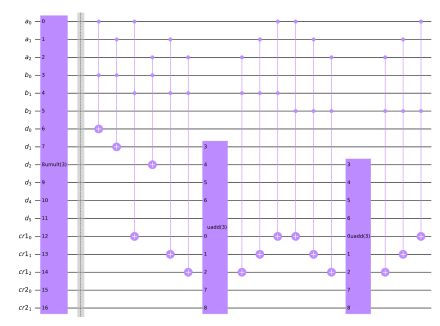

In [10]:
qstyle.update({'fontsize': 18, 'subfontsize': 10})
fig, ax = plt.subplots(figsize=(6,5),dpi=dpi,layout='constrained')

n=3
a = QuantumRegister(n, 'a')
b = QuantumRegister(n, 'b')
d = QuantumRegister(2*n, 'd')
cr1 = QuantumRegister(n, 'cr1')
cr2 = QuantumRegister(n-1, 'cr2')
qc = QuantumCircuit(a, b, d, cr1, cr2)

# to make the internals visible:
qc.append(ari.unsigned_multiplier_gate(n), a[:] + b[:] + d[:] + cr1[:] + cr2[:])
qc.barrier()
ari.unsigned_multiplier(qc, a, b, d, cr1, cr2)
qc.draw(ax=ax, style=qstyle)
filename='paper_diagrams/arith-umult3.png'
fig.savefig(filename)

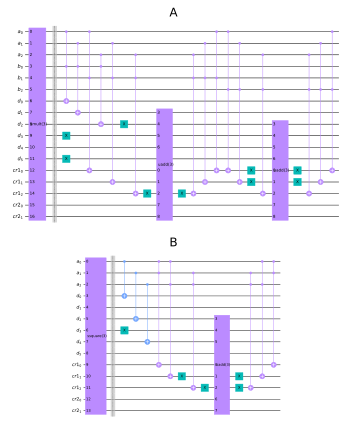

In [11]:
qstyle.update({'fontsize': 16, 'subfontsize': 10})

w=5
h=6
fig = plt.figure(figsize=(w,h), dpi=dpi)
u=1/w
v=1/h
sizes = [[0, 2.8, 5., 2.8], [1,0,3,2.5]]
axs = []
for i, s in enumerate(sizes):
    ss = (s[0]*u, s[1]*v, s[2]*u, s[3]*v)
    ax = fig.add_axes(ss)
    ax.set_title('ABCDEFGH'[i])
    axs.append(ax)

# smult

n=3
a = QuantumRegister(n, 'a')
b = QuantumRegister(n, 'b')
d = QuantumRegister(2*n, 'd')
cr1 = QuantumRegister(n, 'cr1')
cr2 = QuantumRegister(n-1, 'cr2')
qc = QuantumCircuit(a, b, d, cr1, cr2)

# to make the internals visible:
qc.append(ari.signed_multiplier_gate(n), a[:] + b[:] + d[:] + cr1[:] + cr2[:])
qc.barrier()
ari.signed_multiplier(qc, a, b, d, cr1, cr2, use_gates=True)

ax=axs[0]
qc.draw(ax=ax, style=qstyle, fold=-1)

# square

n=3
a = QuantumRegister(n, 'a')
d = QuantumRegister(2*n, 'd')
cr1 = QuantumRegister(n, 'cr1')
cr2 = QuantumRegister(n-1, 'cr2')
qc = QuantumCircuit(a, d, cr1, cr2)

# to hide the internals:
qc.append(ari.signed_square_gate(n), a[:] + d[:] + cr1[:] + cr2[:])
qc.barrier()
# to make the internals visible:
ari.signed_square(qc, a, d, cr1, cr2, use_gates=True)

ax=axs[1]
qc.draw(ax=ax, style=qstyle, fold=-1)


filename='paper_diagrams/arith-smult3+square3.png'
fig.savefig(filename)


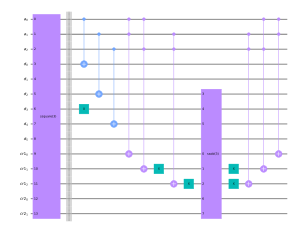

In [12]:
qstyle.update({'fontsize': 13, 'subfontsize': 8})
fig, ax = plt.subplots(figsize=(4,3.5),dpi=dpi,layout='constrained')


n=3
a = QuantumRegister(n, 'a')
d = QuantumRegister(2*n, 'd')
cr1 = QuantumRegister(n, 'cr1')
cr2 = QuantumRegister(n-1, 'cr2')
qc = QuantumCircuit(a, d, cr1, cr2)

# to hide the internals:
qc.append(ari.signed_square_gate(n), a[:] + d[:] + cr1[:] + cr2[:])
qc.barrier()
# to make the internals visible:
ari.signed_square(qc, a, d, cr1, cr2, use_gates=True)

qc.draw(ax=ax, style=qstyle, fold=-1)


filename='paper_diagrams/arith-ssquare3.png'
fig.savefig(filename)


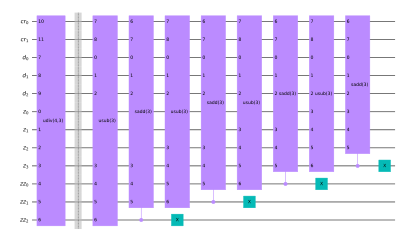

In [13]:
qstyle.update({'fontsize': 16, 'subfontsize': 10})

m=4
n=3
z = QuantumRegister(m, 'z')
zz = QuantumRegister(n, 'zz')
d = QuantumRegister(n, 'd')
cr = QuantumRegister(n-1, 'cr')
qc = QuantumCircuit(cr, d, z, zz)

# to make the internals visible:
qc.append(ari.unsigned_divider_gate(m,n), z[:] + zz[:] + d[:] + cr[:])
qc.barrier()
ari.unsigned_divider(qc, z, zz, d, cr, use_gates=True)

fig, ax = plt.subplots(figsize=(5.5,3.5),dpi=dpi,layout='constrained')
qc.draw(ax=ax,style=qstyle)
filename='paper_diagrams/arith-udiv4.3.png'
fig.savefig(filename)

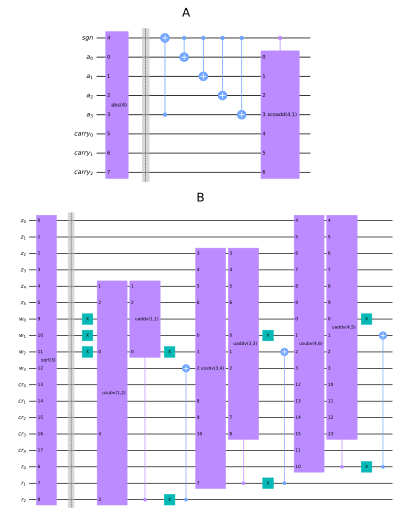

In [14]:
# dpi=300
qstyle1={'name': style_name, 'dpi': dpi, 'fontsize': 13, 'subfontsize': 8}
# qstyle={'name': 'default', 'dpi': dpi, 'fontsize': 16, 'subfontsize': 10}
# ratio=[1,2]
#fig, axs = plt.subplots(2,1,figsize=(6,7),height_ratios=ratio,dpi=dpi,layout='constrained')

w = 6
h = 7.2
dpi=300
qstyle={'name': style_name, 'dpi': dpi, 'fontsize': 13}
fig = plt.figure(figsize=(w,h), dpi=dpi)

u=1/w
v=1/h
sizes = [[0.8,4.4,3.5,2.5], [0,0,5.5,4.2]]
axs = []
for s in sizes:
    ss = (s[0]*u, s[1]*v, s[2]*u, s[3]*v)
    ax = fig.add_axes(ss)
    axs.append(ax)

#abs
n = 4
areg = QuantumRegister(n, 'a')
carry = QuantumRegister(n-1, 'carry')
sgn = QuantumRegister(1, 'sgn')
qc = QuantumCircuit(sgn, areg, carry)

qc.append(ari.absolute_gate(n), areg[:] + sgn[:] + carry[:])
qc.barrier()
ari.absolute(qc, areg, sgn, carry)
ax = axs[0]
ax.set_title('A')
qc.draw(ax=ax,style=qstyle1)

# sqrt

n=3
z = QuantumRegister(2*n, 'z')
r = QuantumRegister(n, 'r')
w = QuantumRegister(n+1, 'w')
cr = QuantumRegister(2*n-1, 'cr')
qc = QuantumCircuit(z, w, cr, r)

qc.append(ari.square_root_gate(n), z[:] + r[:] + w[:] + cr[:])
qc.barrier()
ari.square_root(qc, z, r, w, cr, use_gates=True)
ax=axs[1]
ax.set_title('B')
qc.draw(ax=ax,style=qstyle,fold=-1)

filename='paper_diagrams/arith-abs4+sqrt3.png'
fig.savefig(filename)

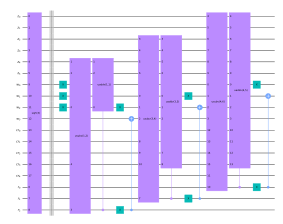

In [15]:
n=3
z = QuantumRegister(2*n, 'z')
r = QuantumRegister(n, 'r')
w = QuantumRegister(n+1, 'w')
cr = QuantumRegister(2*n-1, 'cr')
qc = QuantumCircuit(z, w, cr, r)

qc.append(ari.square_root_gate(n), z[:] + r[:] + w[:] + cr[:])
qc.barrier()
ari.square_root(qc, z, r, w, cr, use_gates=True)

fig, ax = plt.subplots(figsize=(4, 3),dpi=dpi,layout='constrained')
qc.draw(ax=ax,style=qstyle)
filename='paper_diagrams/arith-sqrt3.png'
fig.savefig(filename)

# bitwise gates

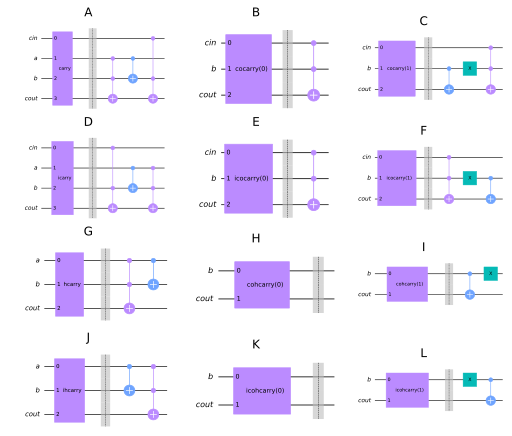

In [16]:
import matplotlib.pyplot as plt
import crsq.arithmetic.bit_ops as bb

dpi=300
qstyle={'name': style_name, 'dpi': dpi, 'fontsize': 16, 'subfontsize': 10}
fig, axs = plt.subplots(4,3,figsize=(7,6),dpi=dpi,layout='constrained')

# (0,0) carry
cin = QuantumRegister(1, "cin")  # carry in
a = QuantumRegister(1, "a")
b = QuantumRegister(1, "b")
cout = QuantumRegister(1, "cout")
qc = QuantumCircuit(cin, a, b, cout)
# hide internals
qc.append(bb.carry_gate(), [cin, a, b, cout])
qc.barrier()
# show internals
bb.carry(qc, cin, a, b, cout)
ax = axs[0][0]
ax.set_title('A')
qc.draw(ax=ax,style=qstyle)

# (0,1) cocarry(0)
cin = QuantumRegister(1, "cin")  # carry in
b = QuantumRegister(1, "b")
cout = QuantumRegister(1, "cout")
qc = QuantumCircuit(cin, b, cout)
y=0
# hide internals
qc.append(bb.cocarry_gate(y), [cin, b, cout])
qc.barrier()
# show internals
bb.cocarry(qc, cin, y, b, cout)
ax = axs[0][1]
ax.set_title('B')
qc.draw(ax=ax,style=qstyle)

# (0,2) cocarry(1)
cin = QuantumRegister(1, "cin")  # carry in
b = QuantumRegister(1, "b")
cout = QuantumRegister(1, "cout")
qc = QuantumCircuit(cin, b, cout)
y=1
# hide internals
qc.append(bb.cocarry_gate(y), [cin, b, cout])
qc.barrier()
# show internals
bb.cocarry(qc, cin, y, b, cout)
ax = axs[0][2]
ax.set_title('C')
qc.draw(ax=ax,style=qstyle)

# (1,0) inverse carry
cin = QuantumRegister(1, "cin")  # carry in
a = QuantumRegister(1, "a")
b = QuantumRegister(1, "b")
cout = QuantumRegister(1, "cout")
qc = QuantumCircuit(cin, a, b, cout)
# hide internals
qc.append(bb.icarry_gate(), [cin, a, b, cout])
qc.barrier()
# show internals
bb.icarry(qc, cin, a, b, cout)
ax = axs[1][0]
ax.set_title('D')
qc.draw(ax=ax,style=qstyle)
filename='paper_diagrams/bits-icarry.png'

# (1,1) icocarry(0)
cin = QuantumRegister(1, "cin")  # carry in
b = QuantumRegister(1, "b")
cout = QuantumRegister(1, "cout")
qc = QuantumCircuit(cin, b, cout)
y=0
# hide internals
qc.append(bb.icocarry_gate(y), [cin, b, cout])
qc.barrier()
# show internals
bb.icocarry(qc, cin, y, b, cout)
ax = axs[1][1]
ax.set_title('E')
qc.draw(ax=ax,style=qstyle)

# (1,2) icocarry(1)
cin = QuantumRegister(1, "cin")  # carry in
b = QuantumRegister(1, "b")
cout = QuantumRegister(1, "cout")
qc = QuantumCircuit(cin, b, cout)
y=1
# hide internals
qc.append(bb.icocarry_gate(y), [cin, b, cout])
qc.barrier()
# show internals
bb.icocarry(qc, cin, y, b, cout)
ax = axs[1][2]
ax.set_title('F')
qc.draw(ax=ax,style=qstyle)

# (2,0) half carry
a = QuantumRegister(1, "a")
b = QuantumRegister(1, "b")
cout = QuantumRegister(1, "cout")
qc = QuantumCircuit(a, b, cout)
# hide internals
qc.append(bb.hcarry_gate(), [a, b, cout])
qc.barrier()
# show internals
bb.hcarry(qc, a, b, cout)
ax = axs[2][0]
ax.set_title('G')
qc.draw(ax=ax,style=qstyle)

# (2,1) cohcarry(0)
b = QuantumRegister(1, "b")
cout = QuantumRegister(1, "cout")
qc = QuantumCircuit(b, cout)
y=0
# hide internals
qc.append(bb.cohcarry_gate(y), [b, cout])
qc.barrier()
# show internals
bb.cohcarry(qc, y, b, cout)
ax = axs[2][1]
ax.set_title('H')
qc.draw(ax=ax,style=qstyle)

# (2,2) cohcarry(1)
b = QuantumRegister(1, "b")
cout = QuantumRegister(1, "cout")
qc = QuantumCircuit(b, cout)
y=1
# hide internals
qc.append(bb.cohcarry_gate(y), [b, cout])
qc.barrier()
# show internals
bb.cohcarry(qc, y, b, cout)
ax = axs[2][2]
ax.set_title('I')
qc.draw(ax=ax,style=qstyle)

# (3,0) inverse half carry
a = QuantumRegister(1, "a")
b = QuantumRegister(1, "b")
cout = QuantumRegister(1, "cout")
qc = QuantumCircuit(a, b, cout)
# hide internals
qc.append(bb.ihcarry_gate(), [a, b, cout])
qc.barrier()
# show internals
bb.ihcarry(qc, a, b, cout)
ax = axs[3][0]
ax.set_title('J')
qc.draw(ax=ax,style=qstyle)

# (3,1) icohcarry(0)
b = QuantumRegister(1, "b")
cout = QuantumRegister(1, "cout")
qc = QuantumCircuit(b, cout)
y=0
# hide internals
qc.append(bb.icohcarry_gate(y), [b, cout])
qc.barrier()
# show internals
bb.icohcarry(qc, y, b, cout)
ax = axs[3][1]
ax.set_title('K')
qc.draw(ax=ax,style=qstyle)

# (3,2) icohcarry(1)
b = QuantumRegister(1, "b")
cout = QuantumRegister(1, "cout")
qc = QuantumCircuit(b, cout)
y=1
# hide internals
qc.append(bb.icohcarry_gate(y), [b, cout])
qc.barrier()
# show internals
bb.icohcarry(qc, y, b, cout)
ax = axs[3][2]
ax.set_title('L')
qc.draw(ax=ax,style=qstyle)


filename=f'paper_diagrams/bits-carry-gates.png'
fig.savefig(filename)

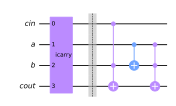

In [17]:

import crsq.arithmetic.bit_ops as bb

cin = QuantumRegister(1, "cin")  # carry in
a = QuantumRegister(1, "a")
b = QuantumRegister(1, "b")
cout = QuantumRegister(1, "cout")
qc = QuantumCircuit(cin, a, b, cout)

# hide internals
qc.append(bb.icarry_gate(), [cin, a, b, cout])
qc.barrier()
# show internals
bb.icarry(qc, cin, a, b, cout)

qc.draw(filename='paper_diagrams/bits-icarry.png', scale=0.45)


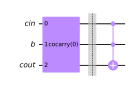

In [18]:

import crsq.arithmetic.bit_ops as bb
cin = QuantumRegister(1, "cin")  # carry in
b = QuantumRegister(1, "b")
cout = QuantumRegister(1, "cout")
qc = QuantumCircuit(cin, b, cout)

y=0

# hide internals
qc.append(bb.cocarry_gate(y), [cin, b, cout])
qc.barrier()
# show internals
bb.cocarry(qc, cin, y, b, cout)

qc.draw(filename=f'paper_diagrams/bits-cocarry{y}.png', scale=0.45)


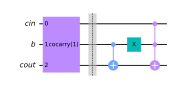

In [19]:

import crsq.arithmetic.bit_ops as bb
cin = QuantumRegister(1, "cin")  # carry in
b = QuantumRegister(1, "b")
cout = QuantumRegister(1, "cout")
qc = QuantumCircuit(cin, b, cout)

y=1

# hide internals
qc.append(bb.cocarry_gate(y), [cin, b, cout])
qc.barrier()
# show internals
bb.cocarry(qc, cin, y, b, cout)

qc.draw(filename=f'paper_diagrams/bits-cocarry{y}.png', scale=0.45)


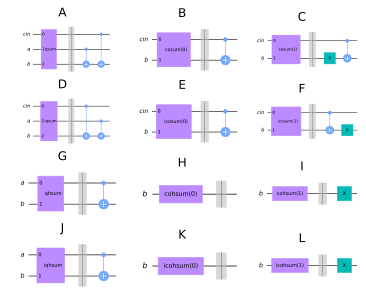

In [20]:

import crsq.arithmetic.bit_ops as bb

dpi=300
qstyle={'name': style_name, 'dpi': dpi, 'fontsize': 16, 'subfontsize': 10}
fig, axs = plt.subplots(4,3,figsize=(5,4),dpi=dpi,layout='constrained')

# (0,0) A qsum
cin = QuantumRegister(1, "cin")  # carry in
a = QuantumRegister(1, "a")
b = QuantumRegister(1, "b")
qc = QuantumCircuit(cin, a, b)
# hide internals
qc.append(bb.qsum_gate(), [cin, a, b])
qc.barrier()
# show internals
bb.qsum(qc, cin, a, b)
ax = axs[0][0]
ax.set_title('A')
qc.draw(ax=ax,style=qstyle)

# (0,1) B cosum(0)
cin = QuantumRegister(1, "cin")  # carry in
# a = QuantumRegister(1, "a")
b = QuantumRegister(1, "b")
qc = QuantumCircuit(cin, b)
y = 0
# hide internals
qc.append(bb.cosum_gate(y), [cin, b])
qc.barrier()
# show internals
bb.cosum(qc, cin, y, b)
ax = axs[0][1]
ax.set_title('B')
qc.draw(ax=ax,style=qstyle)

# (0,2) C cosum(1)
cin = QuantumRegister(1, "cin")  # carry in
# a = QuantumRegister(1, "a")
b = QuantumRegister(1, "b")
qc = QuantumCircuit(cin, b)
y = 1
# hide internals
qc.append(bb.cosum_gate(y), [cin, b])
qc.barrier()
# show internals
bb.cosum(qc, cin, y, b)
ax = axs[0][2]
ax.set_title('C')
qc.draw(ax=ax,style=qstyle)

# (1,0) D iqsum
cin = QuantumRegister(1, "cin")  # carry in
a = QuantumRegister(1, "a")
b = QuantumRegister(1, "b")
qc = QuantumCircuit(cin, a, b)
# hide internals
qc.append(bb.iqsum_gate(), [cin, a, b])
qc.barrier()
# show internals
bb.iqsum(qc, cin, a, b)
ax = axs[1][0]
ax.set_title('D')
qc.draw(ax=ax,style=qstyle)

# (1,1) E icosum(0)
cin = QuantumRegister(1, "cin")  # carry in
# a = QuantumRegister(1, "a")
b = QuantumRegister(1, "b")
qc = QuantumCircuit(cin, b)
y = 0
# hide internals
qc.append(bb.icosum_gate(y), [cin, b])
qc.barrier()
# show internals
bb.icosum(qc, cin, y, b)
ax = axs[1][1]
ax.set_title('E')
qc.draw(ax=ax,style=qstyle)

# (1,2) F icosum(1)
cin = QuantumRegister(1, "cin")  # carry in
# a = QuantumRegister(1, "a")
b = QuantumRegister(1, "b")
qc = QuantumCircuit(cin, b)
y = 1
# hide internals
qc.append(bb.icosum_gate(y), [cin, b])
qc.barrier()
# show internals
bb.icosum(qc, cin, y, b)
ax = axs[1][2]
ax.set_title('F')
qc.draw(ax=ax,style=qstyle)

# (2,0) G qhsum
# qhsum
a = QuantumRegister(1, "a")
b = QuantumRegister(1, "b")
qc = QuantumCircuit(a, b)
# hide internals
qc.append(bb.qhsum_gate(), [a, b])
qc.barrier()
# show internals
bb.qhsum(qc, a, b)
ax = axs[2][0]
ax.set_title('G')
qc.draw(ax=ax,style=qstyle)

# (2,1) H cohsum(0)
# a = QuantumRegister(1, "a")
b = QuantumRegister(1, "b")
qc = QuantumCircuit(b)
y = 0
# hide internals
qc.append(bb.cohsum_gate(y), [b])
qc.barrier()
# show internals
bb.cohsum(qc, y, b)
ax = axs[2][1]
ax.set_title('H')
qc.draw(ax=ax,style=qstyle)

# (2,2) I cohsum(1)
# a = QuantumRegister(1, "a")
b = QuantumRegister(1, "b")
qc = QuantumCircuit(b)
y = 1
# hide internals
qc.append(bb.cohsum_gate(y), [b])
qc.barrier()
# show internals
bb.cohsum(qc, y, b)
ax = axs[2][2]
ax.set_title('I')
qc.draw(ax=ax,style=qstyle)


# (3,0) J iqhsum
# iqhsum
a = QuantumRegister(1, "a")
b = QuantumRegister(1, "b")
qc = QuantumCircuit(a, b)
# hide internals
qc.append(bb.iqhsum_gate(), [a, b])
qc.barrier()
# show internals
bb.iqhsum(qc, a, b)
ax = axs[3][0]
ax.set_title('J')
qc.draw(ax=ax,style=qstyle)

# (3,1) K icohsum(0)
# a = QuantumRegister(1, "a")
b = QuantumRegister(1, "b")
qc = QuantumCircuit(b)
y = 0
# hide internals
qc.append(bb.icohsum_gate(y), [b])
qc.barrier()
# show internals
bb.icohsum(qc, y, b)
ax = axs[3][1]
ax.set_title('K')
qc.draw(ax=ax,style=qstyle)

# (3,2) L icoqhsum(1)
# a = QuantumRegister(1, "a")
b = QuantumRegister(1, "b")
qc = QuantumCircuit(b)
y = 1
# hide internals
qc.append(bb.icohsum_gate(y), [b])
qc.barrier()
# show internals
bb.icohsum(qc, y, b)
ax = axs[3][2]
ax.set_title('L')
qc.draw(ax=ax,style=qstyle)

filename=f'paper_diagrams/bits-sum-gates.png'
fig.savefig(filename)

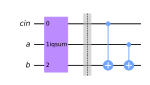

In [21]:

import crsq.arithmetic.bit_ops as bb

cin = QuantumRegister(1, "cin")  # carry in
a = QuantumRegister(1, "a")
b = QuantumRegister(1, "b")
qc = QuantumCircuit(cin, a, b)

# hide internals
qc.append(bb.iqsum_gate(), [cin, a, b])
qc.barrier()
# show internals
bb.iqsum(qc, cin, a, b)

qc.draw(filename='paper_diagrams/bits-isum.png', scale=0.45)


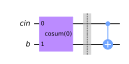

In [22]:

import crsq.arithmetic.bit_ops as bb

cin = QuantumRegister(1, "cin")  # carry in
# a = QuantumRegister(1, "a")
b = QuantumRegister(1, "b")
qc = QuantumCircuit(cin, b)

y = 0
# hide internals
qc.append(bb.cosum_gate(y), [cin, b])
qc.barrier()
# show internals
bb.cosum(qc, cin, y, b)

qc.draw(filename=f'paper_diagrams/bits-cosumc{y}.png', scale=0.45)


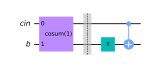

In [23]:

import crsq.arithmetic.bit_ops as bb

cin = QuantumRegister(1, "cin")  # carry in
# a = QuantumRegister(1, "a")
b = QuantumRegister(1, "b")
qc = QuantumCircuit(cin, b)

y = 1
# hide internals
qc.append(bb.cosum_gate(y), [cin, b])
qc.barrier()
# show internals
bb.cosum(qc, cin, y, b)

qc.draw(filename=f'paper_diagrams/bits-cosumc{y}.png', scale=0.45)
